<a href="https://colab.research.google.com/github/krldlamini/edm_brazildengue/blob/main/CCM_Analysis/notebooks/Sao_Paulo_CCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing pyEDM

In [3]:
!pip install pyEDM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 23.6 MB/s eta 0:00:00


# Importing packages

In [4]:
from pyEDM import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Uploading the data for analysis

In [5]:
file_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Combined_Files/355030_A701_combined.csv'
data_sp = pd.read_csv(file_path, delimiter = ',')

# Dropping dates

In [6]:
data_sp = data_sp.drop(columns = ['data'])

# Dropping NaNs in the DataFrame

In [7]:
data_sp = data_sp.dropna()

In [8]:
data_sp

,Unnamed: 0,cases,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
0,0,0,10.2,23.192857,22.289286,75.702381,70.595238
1,1,23,50.0,22.606548,21.804167,77.904762,72.779762
2,2,28,27.8,22.836310,21.920833,80.577381,75.511905
3,3,15,26.6,23.267262,22.310714,79.589286,74.267857
4,4,24,149.8,24.393413,23.331138,78.778443,72.754491
...,...,...,...,...,...,...,...
776,776,15,8.4,22.804167,21.580357,70.988095,65.535714
777,777,25,9.0,20.926786,19.715476,66.214286,60.779762
778,778,37,117.4,22.691667,21.687500,82.303571,77.297619
779,779,31,15.8,22.136310,20.810119,68.666667,62.654762


# Calculating general stats

In [26]:
# Selecting the clumns for the climate variables
climate_columns = data_sp.iloc[:, 2:]

# Renaming columns
new_column_names = {
    'precipitacao_total_horario': 'Total_Precip',
    'temperatura_maxima_na_hora_ant': 'Max_Temp',
    'temperatura_minima_na_hora_ant': 'Min_Temp',
    'umidade_rel_max_na_hora_ant': 'Max_Rel_Humidity',
    'umidade_rel_min_na_hora_ant': 'Min_Rel_Humidity',
}

climate_columns.rename(columns=new_column_names, inplace=True)

# Calculating the statistics
mean_values = climate_columns.mean()
min_values = climate_columns.min()
max_values = climate_columns.max()
range_values = max_values - min_values

# Combining these into a new DataFrame
stats_df = pd.DataFrame({
    'Variable': climate_columns.columns,
    'Mean': mean_values,
    'Min': min_values,
    'Max': max_values,
    'Range': range_values
}).reset_index(drop=True)

print(stats_df)


           Variable       Mean        Min         Max       Range
0      Total_Precip  30.439231   0.000000  291.600000  291.600000
1          Max_Temp  20.908575  12.515823   28.843452   16.327630
2          Min_Temp  19.866814  11.769620   27.352381   15.582761
3  Max_Rel_Humidity  72.655053  45.857143   93.178571   47.321429
4  Min_Rel_Humidity  67.515820  40.672619   89.654762   48.982143


# Finding the right embedding dimension

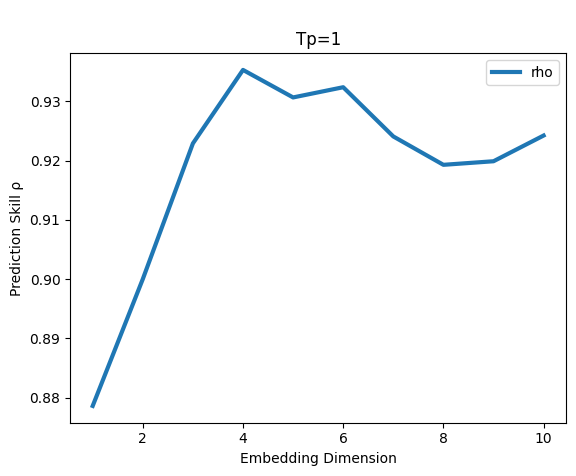

In [ ]:
rho_E = EmbedDimension(dataFrame = data_sp, columns = 'cases',
                        target = 'cases', lib = '1 780',
                        pred = '1 780', showPlot = True)

In [ ]:
rho_E

,E,rho
0,1.0,0.878601
1,2.0,0.900019
2,3.0,0.922919
3,4.0,0.935328
4,5.0,0.930683
5,6.0,0.932407
6,7.0,0.924097
7,8.0,0.919306
8,9.0,0.919910
9,10.0,0.924251


# Doing CCM

Normalizing the data

In [ ]:
data_sp_norm = (data_sp-data_sp.mean())/data_sp.std()

In [ ]:
data_sp_norm

,Unnamed: 0,cases,precipitacao_total_horario,temperatura_maxima_na_hora_ant,temperatura_minima_na_hora_ant,umidade_rel_max_na_hora_ant,umidade_rel_min_na_hora_ant
0,-1.727601,-0.290409,-0.546010,0.811546,0.889999,0.432964,0.416788
1,-1.723172,-0.253223,0.527707,0.603245,0.711770,0.745877,0.712455
2,-1.718742,-0.245139,-0.071201,0.684874,0.754632,1.125602,1.082240
3,-1.714312,-0.266157,-0.103574,0.837980,0.897872,0.985214,0.913863
4,-1.709882,-0.251606,3.220093,1.238072,1.272768,0.870010,0.709035
...,...,...,...,...,...,...,...
776,1.709916,-0.266157,-0.594570,0.673454,0.629544,-0.236841,-0.268000
777,1.714346,-0.249989,-0.578384,0.006470,-0.055600,-0.915102,-0.911700
778,1.718776,-0.230588,2.346012,0.633486,0.668907,1.370859,1.323930
779,1.723206,-0.240289,-0.394935,0.436182,0.346564,-0.566669,-0.657926


# Cases and Average Maximum Temperature

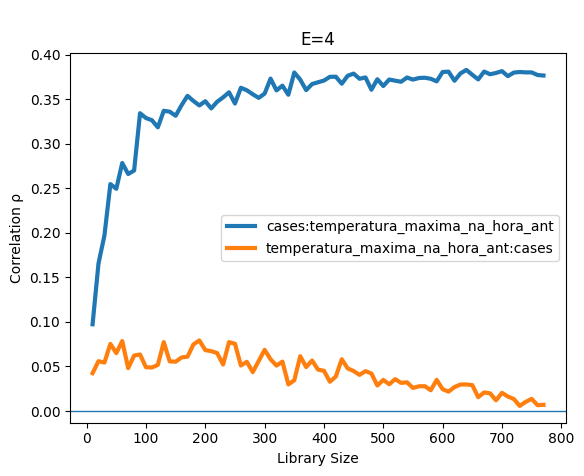

In [ ]:
CCM_maxtemp = CCM( dataFrame = data_sp_norm, E = 4,
     columns = 'cases', target = 'temperatura_maxima_na_hora_ant',
     libSizes = '10 770 10', sample = 10, showPlot = True )

# Cases and Average Minimum Temperature

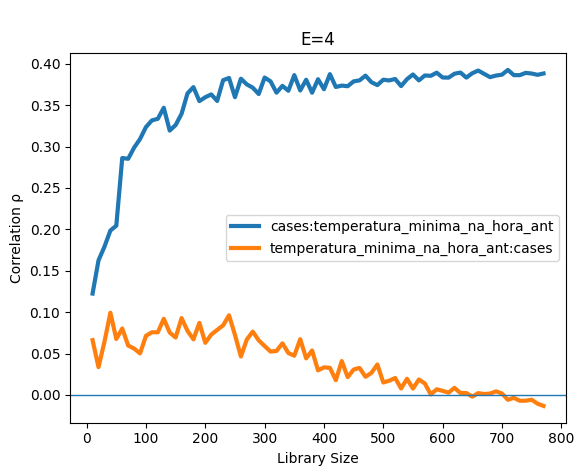

In [ ]:
CCM_mintemp = CCM( dataFrame = data_sp_norm, E = 4,
     columns = 'cases', target = 'temperatura_minima_na_hora_ant',
     libSizes = '10 770 10', sample = 10, showPlot = True );

# Cases and Total precipitation

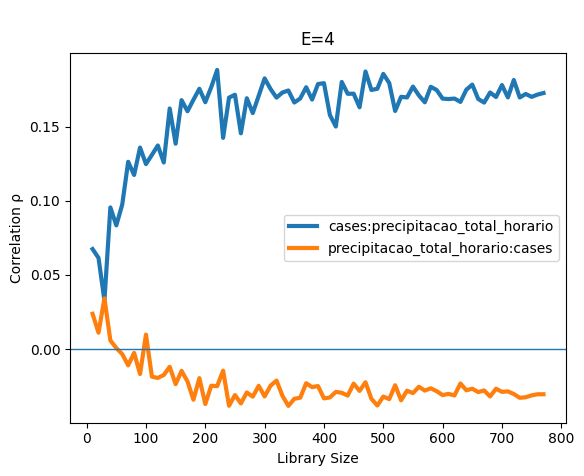

In [ ]:
CCM_precipitation = CCM( dataFrame = data_sp_norm, E = 4,
     columns = 'cases', target = 'precipitacao_total_horario',
     libSizes = '10 770 10', sample = 10, showPlot = True );

# Cases and Average Minimum Humidity

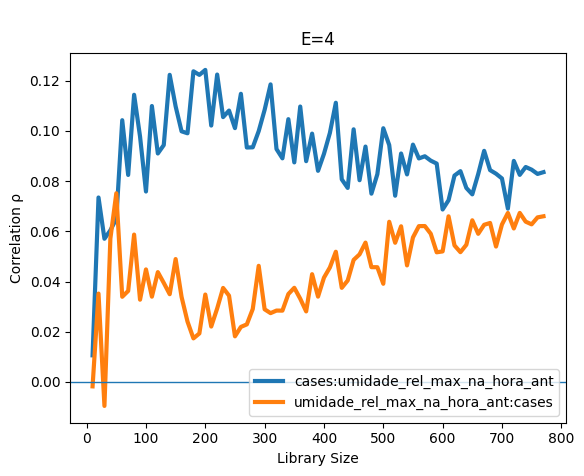

In [ ]:
CCM_precipitation = CCM( dataFrame = data_sp_norm, E = 4,
     columns = 'cases', target = 'umidade_rel_max_na_hora_ant',
     libSizes = '10 770 10', sample = 10, showPlot = True );

# Cases and Average Maximum Humidity

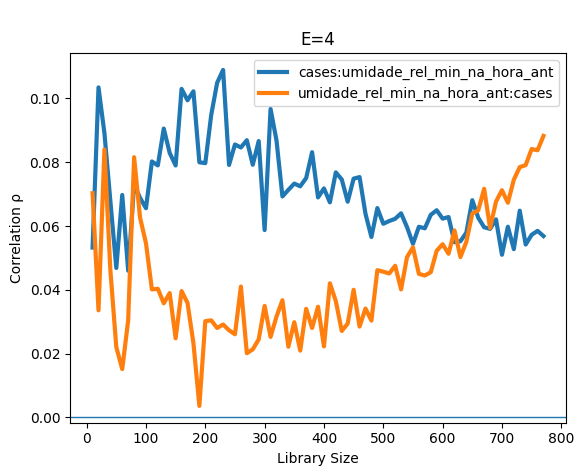

In [ ]:
CCM_precipitation = CCM( dataFrame = data_sp_norm, E = 4,
     columns = 'cases', target = 'umidade_rel_min_na_hora_ant',
     libSizes = '10 770 10', sample = 10, showPlot = True );